# Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data

In [7]:
#df = pd.read_csv('/Users/pedromonteiro/Library/Mobile Documents/com~apple~CloudDocs/Python VS Code/Bot Data Analysis/data_analysis_bot/data/raw/Avaliação Mensal de Funcionários.csv') - done with the total path path the file. Another way:

df = pd.read_csv('../data/raw/Avaliação Mensal de Funcionários.csv') #../ = return one level on directory hierarchy and from there goes to data.... 
df


,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,"9,6"
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,"9,4"
...,...,...,...,...,...,...,...,...
67,Gerente de Marketing,Marketing,6000,CLT,8,Bacharel,46,9
68,Coordenador de Marketing,Marketing,8000,CLT,8,Bacharel,45,9
69,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,32,"9,4"
70,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,40,"9,6"


# Cleaning Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cargo                  72 non-null     object
 1   Setor                  72 non-null     object
 2   Salário Bruto          72 non-null     int64 
 3   Tipo de Contratação    72 non-null     object
 4   Carga Horária por dia  72 non-null     int64 
 5   Formação               72 non-null     object
 6   Idade                  72 non-null     int64 
 7   NPS interno            72 non-null     object
dtypes: int64(3), object(5)
memory usage: 4.6+ KB


In [10]:
# NPS Interno = string, we must convert it to float to calculate the average asked by the HR

df = pd.read_csv('../data/raw/Avaliação Mensal de Funcionários.csv', decimal= ',') #../ = return one level on directory hierarchy and from there goes to data.... 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cargo                  72 non-null     object 
 1   Setor                  72 non-null     object 
 2   Salário Bruto          72 non-null     int64  
 3   Tipo de Contratação    72 non-null     object 
 4   Carga Horária por dia  72 non-null     int64  
 5   Formação               72 non-null     object 
 6   Idade                  72 non-null     int64  
 7   NPS interno            72 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.6+ KB


,Cargo,Setor,Salário Bruto,Tipo de Contratação,Carga Horária por dia,Formação,Idade,NPS interno
0,Cientista de Dados,Dados,6000,CLT,8,Bacharel,24,9.0
1,Cientista de Dados,Dados,6500,CLT,8,Bacharel,26,9.6
2,Analista de Dados,Dados,5000,CLT,8,Bacharel,29,8.0
3,Analista de Dados,Dados,5800,CLT,8,Bacharel,36,9.0
4,Analista de Dados,Dados,7000,CLT,8,Bacharel,32,9.4
...,...,...,...,...,...,...,...,...
67,Gerente de Marketing,Marketing,6000,CLT,8,Bacharel,46,9.0
68,Coordenador de Marketing,Marketing,8000,CLT,8,Bacharel,45,9.0
69,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,32,9.4
70,Gerente Comercial,Marketing,8000,CLT,8,Bacharel,40,9.6


In [17]:
''''
Setor
Adm-Fin                   8.900000
Dados                     9.231429
Engenharia de Software    9.100000
Engenheiro de Software    8.500000
Marketing                 8.942857
Name: NPS interno, dtype: float64 '''

# Need to replace Engenheiro de Software with Engenharia de Software

df['Setor'].replace( 'Engenheiro de Software', 'Engenharia de Software', inplace=True)

# Visualizations

## NPS per Sector Average

In [38]:
sector_avg = df.groupby('Setor').mean()['NPS interno'].round(2)
sector_avg

Setor
Adm-Fin                   8.90
Dados                     9.23
Engenharia de Software    9.00
Marketing                 8.94
Name: NPS interno, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


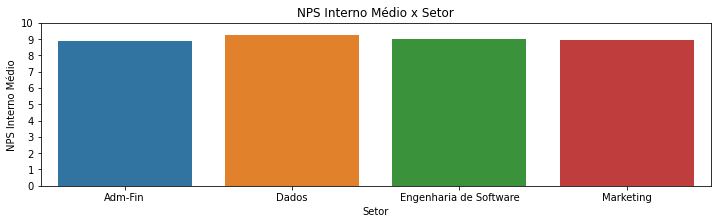

In [80]:
plt.figure(figsize = (12,3))
sns.barplot(sector_avg.index, sector_avg.values)


plt.yticks(np.arange(0, 11,1))
plt.title('NPS Interno Médio x Setor')
plt.ylabel('NPS Interno Médio')
plt.xlabel('Setor');


## NPS per Type of Contract

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


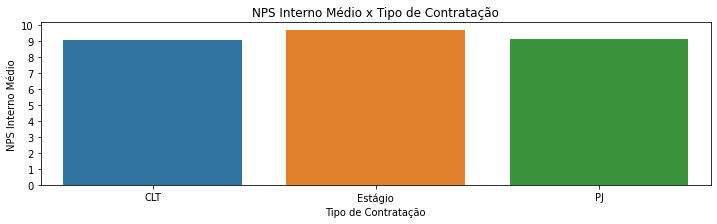

In [82]:
sector_avg = df.groupby('Tipo de Contratação').mean()['NPS interno'].round(2)
sector_avg

plt.figure(figsize = (12,3))
sns.barplot(sector_avg.index, sector_avg.values)

plt.yticks(np.arange(0, 11,1))
plt.title('NPS Interno Médio x Tipo de Contratação')
plt.ylabel('NPS Interno Médio')
plt.xlabel('Tipo de Contratação');



## Distribuition Plot

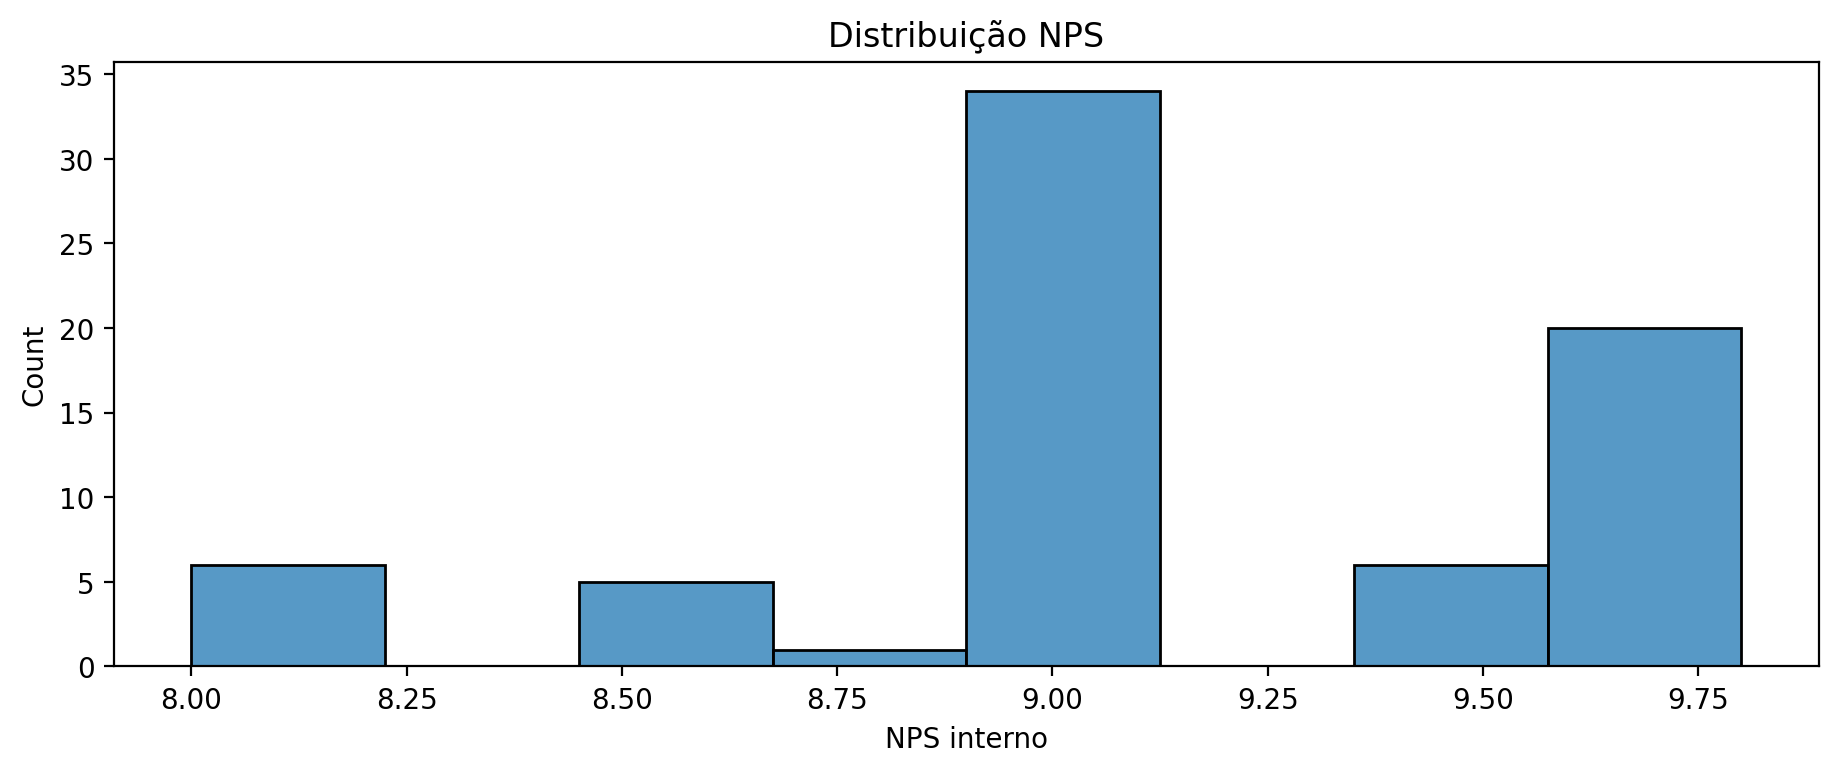

In [95]:
plt.figure(figsize = (11,4),dpi = 200)
sns.histplot(data=df['NPS interno'])
plt.title('Distribuição NPS');